In [1]:
with open ("Gilgamesh_Epic.txt", "r") as f:
    
    # Instantiate an empty list
    gilgamesh = []
    
    for idx, line in enumerate(f):
        gilgamesh.append(line)

## 1. Load the Data

In [3]:
filename = 'Gilgamesh_Epic.txt'

file = open(filename, 'rt')

text = file.read()

file.close()

## 2. Clean the Data

In [11]:
import re

# Get rid of all words between square parentheses
text = re.sub("\[.*?\\]", "", text)

In [12]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

# Tokenize text
tokens = word_tokenize(text)

# Convert to lower case
tokens = [token.lower() for token in tokens]

# Remove all non-alphabetic tokens
words = [word for word in tokens if word.isalpha()]

# Set a variable for english stopwords
stop_words = set(stopwords.words('english'))

# Iterate over words for words that are not stopwords
words = [w for w in words if not w in stop_words]

# Instantiate Porter Stemmer
porter = PorterStemmer()

# Stem words
stemmed = [porter.stem(word) for word in words]

print(stemmed[:100])

['seen', 'everyth', 'make', 'known', 'land', 'teach', 'experienc', 'thing', 'alik', 'anu', 'grant', 'total', 'knowledg', 'saw', 'secret', 'discov', 'hidden', 'brought', 'inform', 'time', 'flood', 'went', 'distant', 'journey', 'push', 'exhaust', 'brought', 'peac', 'carv', 'stone', 'stela', 'toil', 'built', 'wall', 'wall', 'sacr', 'eanna', 'templ', 'holi', 'sanctuari', 'look', 'wall', 'gleam', 'like', 'copper', 'inspect', 'inner', 'wall', 'like', 'one', 'equal', 'take', 'hold', 'threshold', 'stone', 'date', 'ancient', 'time', 'go', 'close', 'eanna', 'templ', 'resid', 'ishtar', 'later', 'king', 'man', 'ever', 'equal', 'go', 'wall', 'uruk', 'walk', 'around', 'examin', 'foundat', 'inspect', 'brickwork', 'thoroughli', 'even', 'core', 'brick', 'structur', 'made', 'brick', 'seven', 'sage', 'lay', 'plan', 'one', 'leagu', 'citi', 'one', 'leagu', 'palm', 'garden', 'one', 'leagu', 'lowland', 'open']


## 3. Exploratory Data Analysis and Visualization

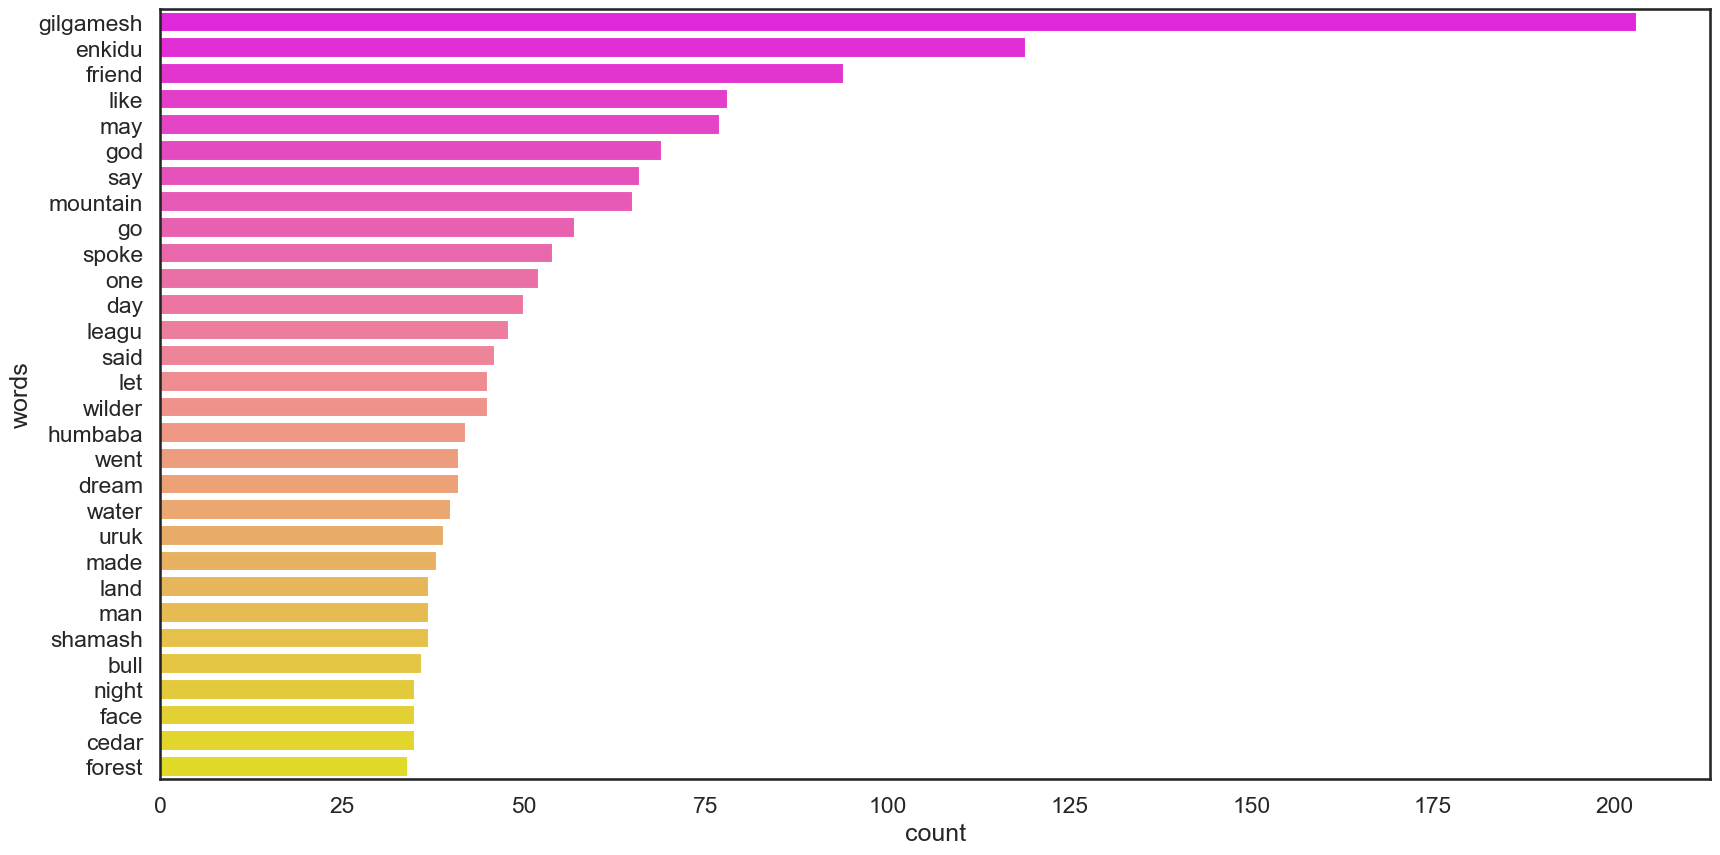

In [49]:
from collections import Counter
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

# Count and find the 30 most frequent
Counter = Counter(stemmed)
most_frequent = Counter.most_common(30)

# Bar plot of frequent words
sns.set_theme(style='white', context='talk')
fig = plt.figure(1, figsize = (20,10))
_ = pd.DataFrame(most_frequent, columns=("words","count"))
sns.barplot(x = 'count', y = 'words', data = _, palette = 'spring');

In [34]:
ans = ' '
for word in stemmed:
   
  # concatenating the strings using the + operator
  ans = ans + ' ' + word

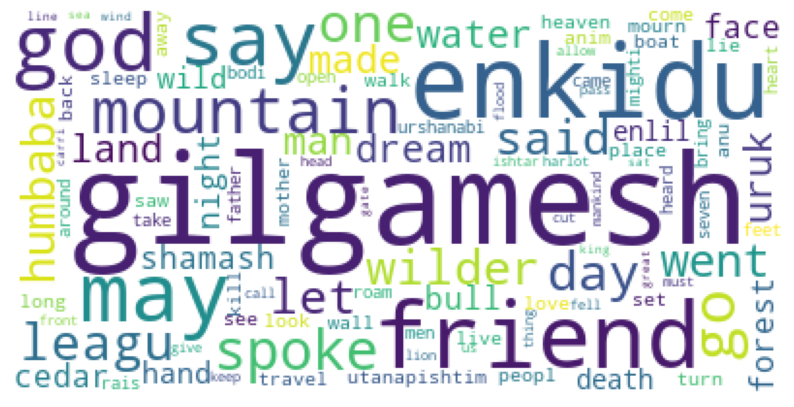

In [35]:
from wordcloud import WordCloud

# Generate the word cloud
wordcloud = WordCloud(background_color="white",
                      max_words= 100,
                      contour_width = 8,
                      contour_color = "steelblue",
                      collocations=False).generate(ans)
                      
# Visualize the word cloud
fig = plt.figure(1, figsize = (10, 10))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

## 4. Creating a Word2Vec Model

In [40]:
all_words = []

all_words.append(stemmed)

In [41]:
# A value of 5 for min_count specifies to include only those words in the Word2Vec
# model that appear at least twice in the corpus.

from gensim.models import Word2Vec

word2vec = Word2Vec(all_words, min_count=5)

In [42]:
vocabulary = word2vec.wv.index_to_key

vocabulary[:10]

['gilgamesh',
 'enkidu',
 'friend',
 'like',
 'may',
 'god',
 'say',
 'mountain',
 'go',
 'spoke']

In [44]:
print(word2vec.wv['gilgamesh'])
print(word2vec.wv.most_similar('gilgamesh'))

[-0.10607442  0.16754627  0.08238106  0.07356066 -0.00651676 -0.2180031
  0.14991558  0.4682576  -0.13429502 -0.09312463 -0.09299207 -0.20315428
  0.02865246  0.0130873  -0.08785833 -0.18345037  0.0313968  -0.2067522
 -0.11107311 -0.35542497  0.02853472  0.09588682  0.00154633 -0.05892054
 -0.0133355  -0.04498159 -0.05121977 -0.15953854 -0.20242108  0.01312861
  0.12834431  0.02388367  0.08160042 -0.10383726 -0.10438947  0.12286468
  0.03484347 -0.1582084  -0.06267585 -0.38525254  0.00630681 -0.11356761
 -0.10130091  0.01497508  0.10512056 -0.10739247 -0.02918965 -0.0510259
  0.10651146  0.15657125  0.07435174 -0.11175546  0.01648386 -0.03064201
 -0.0873455   0.15690789  0.04112717 -0.02684133 -0.27297217  0.17005171
 -0.01611621  0.00460984 -0.01105569 -0.22435245 -0.26248688  0.1031417
  0.12680972  0.20302439 -0.2319238   0.1854044  -0.0887489   0.1511105
  0.1020377  -0.05481469  0.18977769  0.15561011  0.06534286 -0.09488866
 -0.20827964  0.0857913  -0.08958896  0.04385812 -0.1042

## 5. Visualizing Word Similarity with T-SNE

In [62]:
from sklearn.manifold import TSNE

def display_closestwords_tsnescatterplot(word2vec, word):
    
    arr = np.empty((0,100), dtype='f')
    word_labels = [word]
                   
    # Get close words
    close_words = word2vec.wv.most_similar(word)
    
    # add the vector for each of the closest words to the array
    arr = np.append(arr, np.array([word2vec.wv[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = word2vec.wv[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
        # find tsne coords for 2 dimensions
        tsne = TSNE(n_components=2, random_state=0, perplexity=2)
        np.set_printoptions(suppress=True)
        Y = tsne.fit_transform(arr)
        x_coords = Y[:, 0]
        y_coords = Y[:, 1]

        # display scatter plot
        plt.scatter(x_coords, y_coords)

        for label, x, y in zip(word_labels, x_coords, y_coords):
            plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
            plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
            plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
            plt.show()

In [65]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

vectorizer.fit(stemmed)

print(type(vectorizer.idf_))
print('idfs: ', vectorizer.idf_)

vector = vectorizer.transform([stemmed[0]])

print('vectors: ', vector.toarray())

<class 'numpy.ndarray'>
idfs:  [8.60414719 8.89182926 9.29729437 ... 7.91100001 9.29729437 8.89182926]
vectors:  [[0. 0. 0. ... 0. 0. 0.]]


<AxesSubplot: >

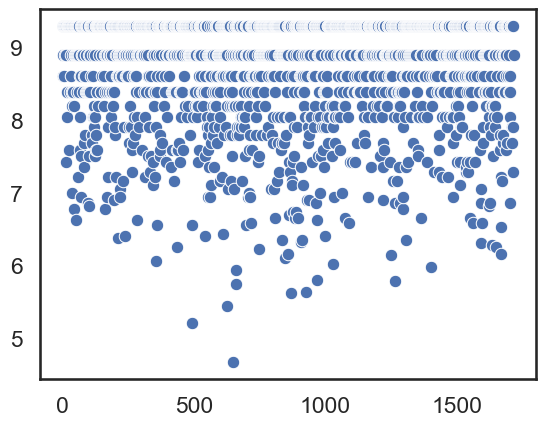

In [68]:
sns.scatterplot(vectorizer.idf_)

In [71]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

word_count_vector = vectorizer.fit_transform(stemmed)

print('shape: ', word_count_vector.shape)

shape:  (8025, 1717)


In [73]:
word_count_df = pd.DataFrame(word_count_vector.toarray(), columns = vectorizer.get_feature_names_out())

word_count_df

,abandon,abat,abil,abl,ablaz,abomin,absolv,abund,account,achiev,...,wrong,ye,year,yet,yoke,yore,young,youth,zikrtt,zikru
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8020,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8021,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8022,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8023,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [74]:
word_count_df.describe()

,abandon,abat,abil,abl,ablaz,abomin,absolv,abund,account,achiev,...,wrong,ye,year,yet,yoke,yore,young,youth,zikrtt,zikru
count,8025.000000,8025.000000,8025.000000,8025.000000,8025.000000,8025.000000,8025.000000,8025.000000,8025.000000,8025.000000,...,8025.000000,8025.000000,8025.000000,8025.000000,8025.000000,8025.000000,8025.000000,8025.000000,8025.000000,8025.000000
mean,0.000374,0.000249,0.000125,0.000249,0.000125,0.000125,0.000125,0.000374,0.000125,0.000249,...,0.000125,0.000125,0.001121,0.000872,0.000125,0.000125,0.001745,0.000872,0.000125,0.000249
std,0.019332,0.015786,0.011163,0.015786,0.011163,0.011163,0.011163,0.019332,0.011163,0.015786,...,0.011163,0.011163,0.033472,0.029523,0.011163,0.011163,0.041734,0.029523,0.011163,0.015786
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
